# **This is the starting point of your final face recognition model.  You will need to fill in all of the missing boxes with correct code and sawer all of the conceptual questions.  You are also required to write correct and descriptive comments in each block.  For advanced, write correct and descriptive comments on each line of code.  Once you are approved (all code is working) you can move to Phase 2 of your project. Your model needs to reach a 80% accuracy on your testing data for your final project.**

In [8]:
from tensorflow import keras # imports al of the necessary libraries and functions from libraries that are needed to run this code
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
#Import the mnist object from keras.datasets
from tensorflow.keras.datasets import mnist
import numpy as np
import os, shutil, pathlib
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

# Path to use to save models
OUTPUT_MODEL_BASE = "/content/gdrive/My Drive/AI-Institute_Drew Collaboration/2025model/"
OUTPUT_MODEL_NAME='jai_bazawule_2025'
# You need to know the version of tensorflow if you want to re-import the model on another computer
# to make sure you pull in the right version of tensorflow
# This notebook originally used 2.15.0 on April 22, 2024
# version 2.18.0 on May 15, 2025
print("Tensorflow Version: " + tf.__version__)

Tensorflow Version: 2.18.0


In [9]:
def show_image(im):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [10]:
def show_image_vpp(im,value,prediction,probability):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",student_names[value])
  print("The predicted value is ",student_names[prediction]," with probability: ",probability)

Keep this as is for now. Once you get everything running, you will come back to this and build out the layers using what you know.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

def build_model(input_shape):
    model = Sequential()

    # First hidden layer
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))  # Dropout layer for regularization
    model.add(BatchNormalization())  # Batch normalization

    # Second hidden layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))  # Dropout layer for regularization
    model.add(BatchNormalization())  # Batch normalization

    # Third hidden layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))  # Dropout layer for regularization
    model.add(BatchNormalization())  # Batch normalization

    # Output layer
    model.add(Dense(31, activation='softmax'))  # For binary classification, use 'softmax' for multi-class

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

1) Explain what the 31 means in the output layer.  

Answer: There are 31 different people/names the model can predict.



Note that the number of epochs below is 1.  Don't change it for now, but after you get everything else working, you will need to come back and address this to improve your model's accuracy.  

In [12]:
# Function to train the model using training data and one epoch
def train_model(model,train_tensors,train_labels):
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=25)

2) How do you know if you need more or less epochs?  

Answer: If accuracy is low, try more epochs. If you are overfitting try fewer.

---



In [13]:
# Function to make predictions and return both predicted labels and their probabilities
def predict(model,test_tensors):
    mpredictions = model.predict(test_tensors)
    digit_predictions = np.array([x.argmax() for x in mpredictions]) # get the index of the highest value (predicted label)
    digit_probability = np.array([mpredictions[i][p] for i, p in enumerate(digit_predictions)]) # get confidence score
    return digit_predictions,digit_probability

# Get the training and testing data.  Use this video if you are absent when I go over this in class.  

This is new code and it is not expected that you understand this, but you need to add a shortcut to this folder on your google drive.  Once you have your shortcut, replace the below path after "My Drive/" with your path. I will walk you through this step in class. Once you have done that, run this code to confirm you are accessing the class image files.  If you are not here when we do this part, you can watch this video of how to do it here: https://www.loom.com/share/4316be2eaac34ddfa1fcfed7d7bbbbcf?sid=725db59f-5ceb-43b4-bb14-5c37dd947108
  

Folder link: https://drive.google.com/drive/folders/1-8UNC2YyagZ6cr6nq2USM8ih6wGUOTh8?usp=sharing


In [14]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/gdrive')
#!ls "/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003" # List the contents of your specific project folder
!ls "/content/gdrive/My Drive/EngineeringConcepts2025"
plt.figure(figsize=(10,10)) # Set image display size and the size to which each image will be resized
size_picture = 100

Mounted at /content/gdrive
 Anaysa_Glover	   Eric_Ayers	    Krista_Fongeh       Regie_Ingram
 Ariana_Harris	   Ethan_Edwards    Landon_Calbert      Tameka_Allen
 Armon_Anderson    Grant_Packwood  "Marielle_O'Neill"   Thihini_Nagendran
 Avery_Roberson    Jack_Crippen    "Mayci_O'Neill"      Timothy_Whitaker
 Beth_White	   Jack_Lovell	    Michael_Rashad      Titus_Smith
 Cameron_Green	   Jai_Bazawule     Panselle_Range      Zamyaih_Williams
 Courtney_Bryant   Jordyn_Hanes     Penny_Dunn
 Dustin_Mills	   Kendrick_Myers   Peter_McKnight


<Figure size 1000x1000 with 0 Axes>

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3) In the digit recognition model, what did this (above) block of code do?  Break down your answer into all four parts.

Answer: The block of code loads the MNIST dataset, which contains images and splits them into training and testing sets.

Run the below functions.

In [16]:
# Function to load an image, convert it to grayscale, resize it, and return it as an array
def tensor_from_image(filename):
    img = load_img(filename,color_mode = 'grayscale')
    img = img.resize((size_picture,size_picture))
    return img_to_array(img).reshape((size_picture,size_picture))

In [17]:
# Function to load and label all student images into training and testing datasets
def load_dataset():
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []
    base_directory = pathlib.Path('/content/gdrive/My Drive/EngineeringConcepts2025')
    student_names = os.listdir(base_directory)
    k = 0
    n = 0
    names = []
    for i, s in enumerate(student_names):
        print(i,s)
        if s!=".DS_Store":
            names.append(s)
            student_directory = base_directory / s
            image_names = os.listdir(student_directory)
            for i in image_names:
                fname = student_directory / i
                t = tensor_from_image(fname) / 255
                if n % 9 == 0:
                    test_images.append(t)
                    test_labels.append(k)
                else:
                    train_images.append(t)
                    train_labels.append(k)
                n += 1
            k += 1
    return (k,
            (np.array(train_images),np.array(train_labels)),
            (np.array(test_images),np.array(test_labels)),
            names
           )

Run this code to load your data.  

In [18]:
(nb_students,(train_images,train_labels),(test_images,test_labels),student_names) = load_dataset()


0 Jack_Lovell
1 Ariana_Harris
2 Grant_Packwood
3 Marielle_O'Neill
4 Beth_White
5 Timothy_Whitaker
6 Jack_Crippen
7 Anaysa_Glover
8 Mayci_O'Neill
9 Landon_Calbert
10 Penny_Dunn
11 Eric_Ayers
12 Michael_Rashad
13 Jordyn_Hanes
14 Regie_Ingram
15 Panselle_Range
16 Krista_Fongeh
17 Thihini_Nagendran
18 Titus_Smith
19 Cameron_Green
20 Jai_Bazawule
21 Ethan_Edwards
22 Armon_Anderson
23 Zamyaih_Williams
24 Avery_Roberson
25 Courtney_Bryant
26 Peter_McKnight
27 Kendrick_Myers
28 Dustin_Mills
29 Tameka_Allen


Print out each of the six items in the loaded data to get an idea of or refresh yourself on what they are.

4) Print nb_students.  

In [19]:
print(nb_students)

30


4a) What does this number represent?

Answer: It represents the number of unique people (students) the model is learning to recognize.

5) Print train_images.  

In [20]:
print(train_images)

[[[0.63529414 0.6745098  0.70980394 ... 0.5294118  0.53333336 0.53333336]
  [0.6784314  0.7176471  0.7529412  ... 0.53333336 0.53333336 0.5372549 ]
  [0.73333335 0.76862746 0.8        ... 0.5372549  0.5411765  0.54509807]
  ...
  [0.03921569 0.03529412 0.03921569 ... 0.4117647  0.3647059  0.23921569]
  [0.03529412 0.03529412 0.03529412 ... 0.41568628 0.36862746 0.26666668]
  [0.03529412 0.03921569 0.03529412 ... 0.41960785 0.38039216 0.29803923]]

 [[0.7529412  0.79607844 0.8352941  ... 0.6156863  0.6156863  0.61960787]
  [0.79607844 0.8352941  0.8666667  ... 0.6156863  0.61960787 0.61960787]
  [0.8392157  0.8745098  0.9019608  ... 0.6156863  0.61960787 0.61960787]
  ...
  [0.04705882 0.04313726 0.04313726 ... 0.4392157  0.42745098 0.36078432]
  [0.05490196 0.04313726 0.04313726 ... 0.43137255 0.42745098 0.36862746]
  [0.04705882 0.04313726 0.04705882 ... 0.43137255 0.42352942 0.3882353 ]]

 [[0.5411765  0.57254905 0.6117647  ... 0.36862746 0.36862746 0.36862746]
  [0.5764706  0.603921

5a) What is train_images?  

Answer: train_images is a NumPy array containing grayscale image data for training. Each image has been converted into numerical values so the model can learn from it.

6) Print train_labels.

In [21]:
print(train_labels)

[ 0  0  0 ... 29 29 29]


6a) What do these numerical values represent?  

Answer: These numerical values represent the name labels for each image specifically, they are index numbers that correspond to the names of students in the student_names list.

7) Print test_images.  

In [22]:
print(test_images)

[[[0.627451   0.6666667  0.7058824  ... 0.5137255  0.5176471  0.5254902 ]
  [0.6666667  0.69803923 0.7294118  ... 0.5176471  0.52156866 0.5254902 ]
  [0.70980394 0.7411765  0.76862746 ... 0.52156866 0.5254902  0.5294118 ]
  ...
  [0.21176471 0.15686275 0.09803922 ... 0.37254903 0.30588236 0.24313726]
  [0.4627451  0.13725491 0.09019608 ... 0.3764706  0.29803923 0.25882354]
  [0.5058824  0.1254902  0.13725491 ... 0.37254903 0.30980393 0.2901961 ]]

 [[0.627451   0.6666667  0.7058824  ... 0.5176471  0.5176471  0.52156866]
  [0.6666667  0.69803923 0.7294118  ... 0.5176471  0.52156866 0.5254902 ]
  [0.70980394 0.7411765  0.76862746 ... 0.52156866 0.5254902  0.5294118 ]
  ...
  [0.21176471 0.15686275 0.09803922 ... 0.52156866 0.4509804  0.39607844]
  [0.4627451  0.13333334 0.09019608 ... 0.3529412  0.30980393 0.29803923]
  [0.5019608  0.1254902  0.13333334 ... 0.3529412  0.38039216 0.35686275]]

 [[0.7019608  0.74509805 0.78431374 ... 0.6039216  0.60784316 0.60784316]
  [0.7490196  0.788235

8) Print test_labels.

In [23]:
print(test_labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12
 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15

9) Print student_names.

In [24]:
print(student_names)

['Jack_Lovell', 'Ariana_Harris', 'Grant_Packwood', "Marielle_O'Neill", 'Beth_White', 'Timothy_Whitaker', 'Jack_Crippen', 'Anaysa_Glover', "Mayci_O'Neill", 'Landon_Calbert', 'Penny_Dunn', 'Eric_Ayers', 'Michael_Rashad', 'Jordyn_Hanes', 'Regie_Ingram', 'Panselle_Range', 'Krista_Fongeh', 'Thihini_Nagendran', 'Titus_Smith', 'Cameron_Green', 'Jai_Bazawule', 'Ethan_Edwards', 'Armon_Anderson', 'Zamyaih_Williams', 'Avery_Roberson', 'Courtney_Bryant', 'Peter_McKnight', 'Kendrick_Myers', 'Dustin_Mills', 'Tameka_Allen']


10) Assign the shape of train_images to train_shape. Print train_shape.

In [25]:
train_shape = train_images.shape
print(train_shape)

(4053, 100, 100)


11) Print out the first image train_images in matrix format.



In [26]:
print(train_images[0])

[[0.63529414 0.6745098  0.70980394 ... 0.5294118  0.53333336 0.53333336]
 [0.6784314  0.7176471  0.7529412  ... 0.53333336 0.53333336 0.5372549 ]
 [0.73333335 0.76862746 0.8        ... 0.5372549  0.5411765  0.54509807]
 ...
 [0.03921569 0.03529412 0.03921569 ... 0.4117647  0.3647059  0.23921569]
 [0.03529412 0.03529412 0.03529412 ... 0.41568628 0.36862746 0.26666668]
 [0.03529412 0.03921569 0.03529412 ... 0.41960785 0.38039216 0.29803923]]


12) Print out the first image in train images in image format.

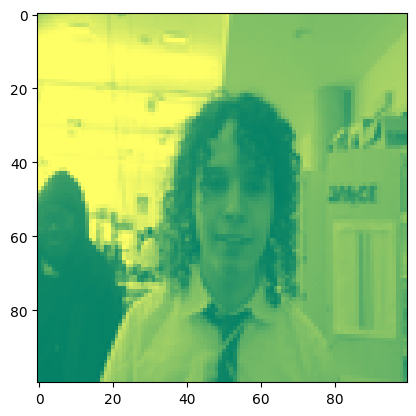

In [27]:
plt.imshow(train_images[0],cmap=plt.cm.summer)
plt.show()

13) Print out the label for this image.

In [28]:
print(train_labels[0])

0


Print out the name associated with this label.

In [29]:
print(student_names[train_labels[0]])

Jack_Lovell


14) Print out the second name in student_names.

In [30]:
print(student_names[1])

Ariana_Harris


15) Write a for loop to print out all of the names in the list student_names and their indices (indexes).  

In [31]:
for i in range(len(student_names)):
  print(i, student_names[i])

0 Jack_Lovell
1 Ariana_Harris
2 Grant_Packwood
3 Marielle_O'Neill
4 Beth_White
5 Timothy_Whitaker
6 Jack_Crippen
7 Anaysa_Glover
8 Mayci_O'Neill
9 Landon_Calbert
10 Penny_Dunn
11 Eric_Ayers
12 Michael_Rashad
13 Jordyn_Hanes
14 Regie_Ingram
15 Panselle_Range
16 Krista_Fongeh
17 Thihini_Nagendran
18 Titus_Smith
19 Cameron_Green
20 Jai_Bazawule
21 Ethan_Edwards
22 Armon_Anderson
23 Zamyaih_Williams
24 Avery_Roberson
25 Courtney_Bryant
26 Peter_McKnight
27 Kendrick_Myers
28 Dustin_Mills
29 Tameka_Allen


16) Reshape your train_images "from a box into a line" and assign them to train_tensors.  Print out train_tensors.shape to confirm that they have been put into a line.  

In [32]:
train_tensors = train_images.reshape(train_images.shape[0], -1)
train_tensors.shape


(4053, 10000)

17) Call the build model function with the correct parameter (the second value in train_tensors.shape). Make sure you name the output "model."

In [33]:
model = build_model((train_tensors.shape[1],))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18) Print out the model summary using the summary method.

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │         1,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,383 (4.93 MB)

 Trainable params: 1,291,935 (4.93 MB)

 Non-trainable params: 448 (1.75 KB)

19) Call the train model function with the appropraite parameters. Remember all functions are defined above if you need a reference.

In [35]:
train_model(model,train_tensors,train_labels)

Epoch 1/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.1140 - loss: 3.4212
Epoch 2/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2875 - loss: 2.7292
Epoch 3/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3313 - loss: 2.3914
Epoch 4/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3187 - loss: 2.4118
Epoch 5/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3376 - loss: 2.3053
Epoch 6/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3746 - loss: 2.1726
Epoch 7/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3789 - loss: 2.1119
Epoch 8/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3715 - loss: 2.0849
Epoch 9/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4054 - loss: 2.0156
Epoch 10/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4100 - loss: 2.0050
Epoch 11/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4038 - loss: 2.0048
Epoch 12/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 

In [36]:
import json
with open(os.path.join(OUTPUT_MODEL_BASE, "%s_labels.json") % (OUTPUT_MODEL_NAME), 'w') as f:
  f.write(json.dumps(student_names))


# Convert model to TFLite format and save
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open(os.path.join(OUTPUT_MODEL_BASE, '%s.tflite' % (OUTPUT_MODEL_NAME)), 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpzi83og9f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10000), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 31), dtype=tf.float32, name=None)
Captures:
  137288224468304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224472912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224468688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224470224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224462160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224469456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224468496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224463120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224472528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224467920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137288224466192: Te

*20*) What is an epoch?

Answer: One full pass through all the training data. It will generate a trendline to increase accuracy in the next epoch.

21) The model is trained; it is time to see how well it does at recognizing your faces!!  To do this you need to reshape the testing dataset and assign it to test_shape.


In [ ]:
test_shape = test_images.shape
test_shape

(500, 100, 100)

22) Reshape your test_images "from a box to a line" and assign them to test_tensors.

In [37]:
test_tensors = test_images.reshape(test_images.shape[0], -1)
test_tensors.shape


(507, 10000)

23) Print your 20th test image in matrix format.

In [ ]:
print(test_images[19])

[[0.7647059  0.7529412  0.78039217 ... 0.5803922  0.58431375 0.5921569 ]
 [0.76862746 0.7529412  0.7607843  ... 0.58431375 0.5882353  0.5921569 ]
 [0.77254903 0.77254903 0.76862746 ... 0.5882353  0.5921569  0.59607846]
 ...
 [0.08627451 0.07058824 0.07843138 ... 0.4        0.50980395 0.6627451 ]
 [0.09019608 0.06666667 0.07450981 ... 0.3764706  0.4745098  0.6509804 ]
 [0.09019608 0.06666667 0.07843138 ... 0.39607844 0.41568628 0.5411765 ]]


24) Print your 20th test image in image format.

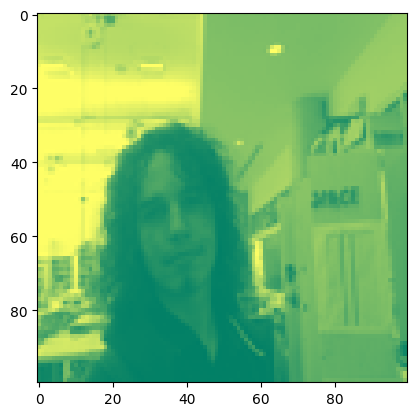

In [ ]:
plt.imshow(test_images[19],cmap=plt.cm.summer)
plt.show()

25) Print the label that represents this image (numerical value).  

In [ ]:
print(test_labels[19])

0


26) Print the corresponding students' name that is represented by this image.

In [ ]:
print(student_names[test_labels[19]])

Jack_Lovell


Now we can make predictions and get probabilities.  I will be checking this block to make sure that everything above it has run. Do not edit this block of code at all.

In [38]:
pred, prob = predict(model,test_tensors)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [39]:
pred

array([ 0,  0,  0,  0, 20,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0, 20,  0,
       20,  0, 21,  0,  0,  0, 20,  0,  0,  0,  0, 21,  4,  1, 10, 10, 16,
       10,  1, 20,  1, 16,  1, 10, 10, 10,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2, 18,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, 21,  2,  2,  2,  2,  2, 21,  2,  2, 21, 21, 16,  4,
       20, 20, 20, 21, 20, 21, 16, 21,  6,  4,  4,  4,  4,  4,  4,  4, 14,
        4,  4,  4,  4,  4,  4,  4,  4,  1,  4,  4,  4,  1, 21,  4, 10,  4,
       14,  5,  5,  6,  5,  5,  5,  5,  5,  2, 15, 21, 12,  5, 14,  6, 10,
        6, 21,  2, 21, 15,  6,  2,  2,  2, 21, 10, 20, 20, 20, 21, 10, 20,
       20, 10,  4, 10, 13,  4, 10, 13, 21, 10, 10, 15, 14,  9, 14,  2, 10,
       15, 10, 15, 15,  9

27) Describe what these numerical values mean.

Answer:These are the predicted labels for each image in the test dataset. Each number represents the model's guess for which student is in each image.

In [ ]:
prob

array([0.3555281 , 0.36294782, 0.30670926, 0.31516722, 0.17612581,
       0.35157213, 0.37606183, 0.30282408, 0.2874717 , 0.30217943,
       0.26322478, 0.3053829 , 0.17538837, 0.3163011 , 0.33909318,
       0.35959727, 0.33540407, 0.32170138, 0.2979737 , 0.29813978,
       0.3982427 , 0.29279792, 0.25696227, 0.28529546, 0.2679318 ,
       0.31166318, 0.48283476, 0.3060687 , 0.19414735, 0.1288541 ,
       0.28524765, 0.25664818, 0.176129  , 0.38027155, 0.1659646 ,
       0.28093633, 0.19390668, 0.26409888, 0.4524669 , 0.3251829 ,
       0.22242934, 0.16635248, 0.24509922, 0.24046013, 0.2269201 ,
       0.23814297, 0.54357386, 0.24587007, 0.24575065, 0.43132088,
       0.16607675, 0.39922678, 0.24260467, 0.16287275, 0.3753919 ,
       0.19197264, 0.47754171, 0.20760046, 0.20245714, 0.23621124,
       0.18196547, 0.30445307, 0.22733703, 0.21127798, 0.23992302,
       0.23943423, 0.20546147, 0.7679882 , 0.19667314, 0.22847144,
       0.2298468 , 0.24495813, 0.20674895, 0.23157391, 0.23940

28) Describe what these numerical values mean.

Answer:  These are the predicted probabilities for each image. Each value shows how confident the model is in its prediction. Higher probabilities mean the model is more confident in its guess.

29) Print the 30th image in the test image dataset, its label and prediction and probability.

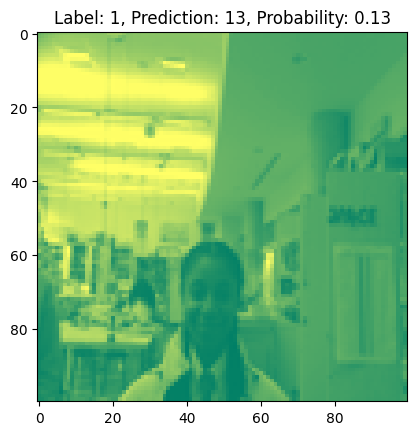

In [ ]:
index = 29
plt.imshow(test_images[index], cmap=plt.cm.summer)
plt.title(f"Label: {test_labels[index]}, Prediction: {pred[index]}, Probability: {prob[index]:.2f}")
plt.show()

30) Plot the 3rd image in the test_images dataset, its label, prediction, and probability.  

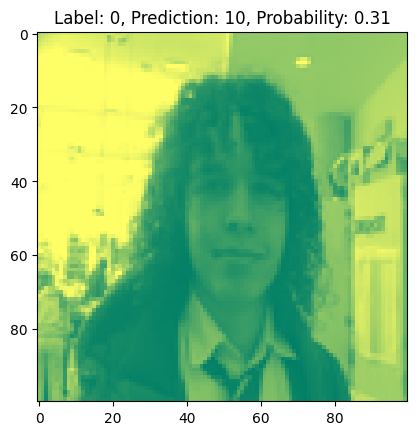

In [ ]:
index = 2
plt.imshow(test_images[index], cmap=plt.cm.summer)
plt.title(f"Label: {test_labels[index]}, Prediction: {pred[index]}, Probability: {prob[index]:.2f}")
plt.show()

Compute the number of wrong predictions. If everything above is running correctly this code block should run. Do not change it.  

In [40]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

216

31) Explain which two items are being compared in your own words to get the "wrong_predictions."

Answer: The model's predicted label is being compared to the actual label for each image in the test dataset. If they don’t match, it's counted as a wrong prediction.

Determine the number of wrong predictions in the test dataset.  If everything above is running correctly this code block should run. Do not change it.

In [41]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

216

Calculate the accuracy on the test_images.  If everything above is running correctly this code block should run. Do not change it.

In [42]:
accuracy = 1-(wrong_predictions_count/len(test_labels))
accuracy

0.5739644970414202

32) Determine the number of wrong predictions in the training dataset.  


In [43]:
train_pred, train_prob = predict(model, train_tensors)

wrong_train_predictions = 0
for i in range(train_images.shape[0]):
    if train_labels[i] != train_pred[i]:
        wrong_train_predictions += 1

wrong_train_predictions

127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


1608

33) Calculate the accuracy on the training_images.  

In [ ]:
train_accuracy = 1 - (wrong_train_predictions / len(train_labels))
train_accuracy

0.21350000000000002

34) Describe why the accuracy of the training images is higher than that of the testing images.  

Answer: The training accuracy is usually higher because the model has already seen and learned from the training images. The testing images are new to the model, so it makes more mistakes on them.


35) Display the first 10 faces in the training dataset, their predictions and probabilities.


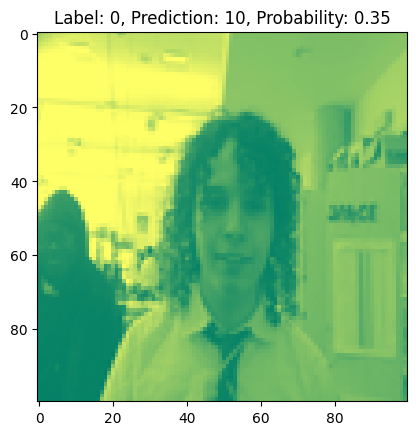

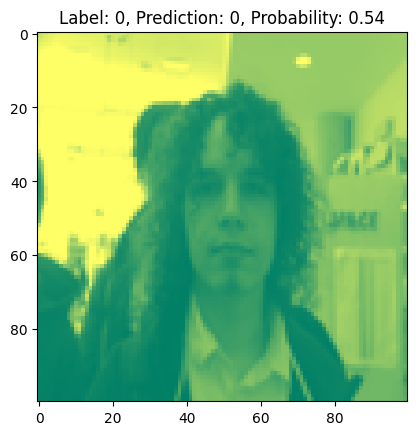

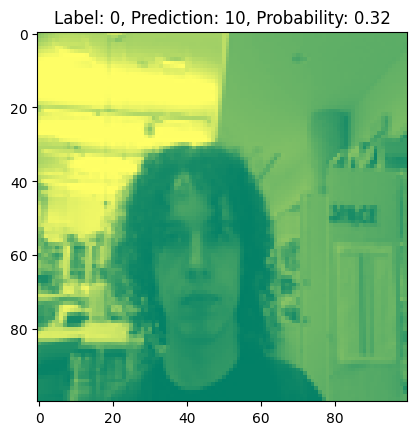

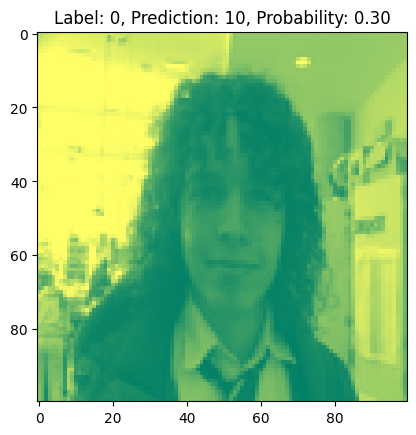

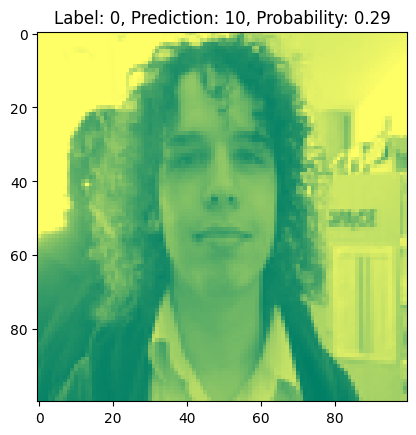

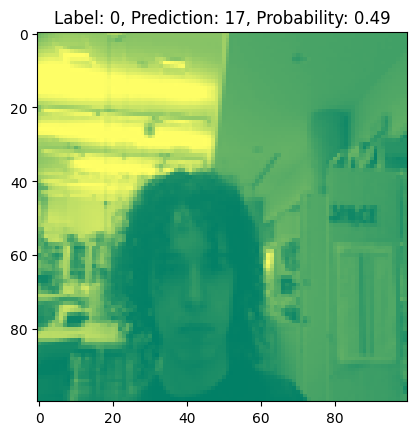

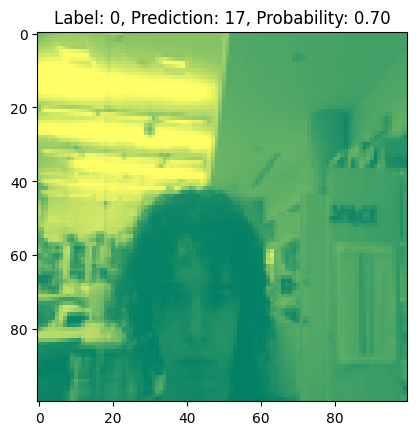

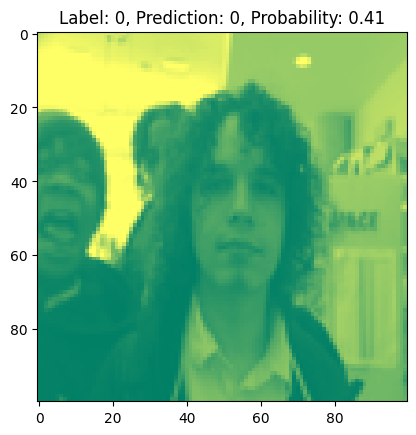

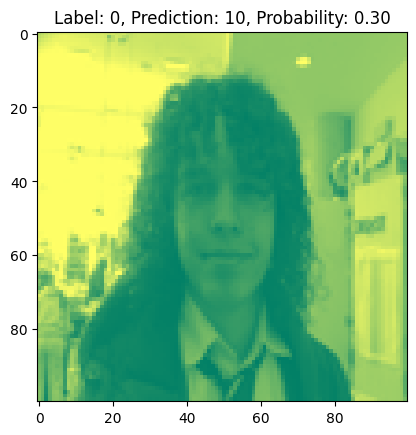

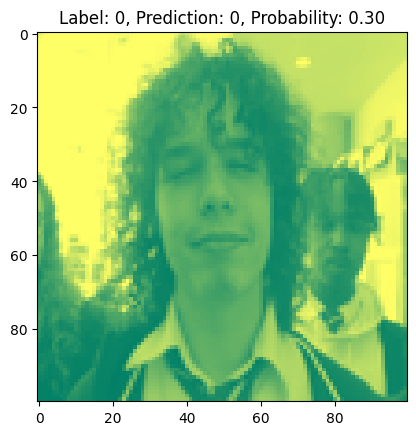

In [ ]:
for i in range(10):
  plt.imshow(train_images[i], cmap=plt.cm.summer)
  plt.title(f"Label: {train_labels[i]}, Prediction: {train_pred[i]}, Probability: {train_prob[i]:.2f}")
  plt.show()


Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.


In [ ]:
model.evaluate(train_tensors, train_labels)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2174 - loss: 2.2244


[2.432384729385376, 0.2134999930858612]

Once you get this entire model working (don't worry about the accuracy yet), call me over to grade it.  Once you get it working it will be time to manipulate the building model function and training model function for accuracy.  